In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame,Series
%matplotlib inline

In [275]:
train = pd.read_csv("Train_new.csv")
train["Train"]=True
test = pd.read_csv("Test_new.csv")
test["Train"]=False
data=pd.concat([train,test],axis=0)

In [276]:
data["Var1"] = data["Var1"].apply(lambda x: 470 if x>470 else x)

In [17]:
data.columns

Index(['ID', 'Park_ID', 'Date', 'Direction_Of_Wind', 'Average_Breeze_Speed',
       'Max_Breeze_Speed', 'Min_Breeze_Speed', 'Var1',
       'Average_Atmospheric_Pressure', 'Max_Atmospheric_Pressure',
       'Min_Atmospheric_Pressure', 'Min_Ambient_Pollution',
       'Max_Ambient_Pollution', 'Average_Moisture_In_Park',
       'Max_Moisture_In_Park', 'Min_Moisture_In_Park', 'Location_Type',
       'Footfall', 'Day', 'Weekday', 'Year', 'Month'],
      dtype='object')

In [281]:
train.corr()["Footfall"]

ID                              0.005945
Park_ID                         0.004938
Direction_Of_Wind               0.098399
Average_Breeze_Speed           -0.074982
Max_Breeze_Speed               -0.038060
Min_Breeze_Speed               -0.110378
Var1                            0.059795
Average_Atmospheric_Pressure   -0.057305
Max_Atmospheric_Pressure       -0.111381
Min_Atmospheric_Pressure       -0.007582
Min_Ambient_Pollution           0.180966
Max_Ambient_Pollution           0.390374
Average_Moisture_In_Park       -0.391229
Max_Moisture_In_Park           -0.096657
Min_Moisture_In_Park           -0.438461
Location_Type                   0.004230
Footfall                        1.000000
Day                             0.002836
Weekday                         0.000136
Year                           -0.010730
Month                           0.054729
Train                                NaN
Name: Footfall, dtype: float64

In [278]:
data["Pressure/Moisture"] = ((data["Average_Moisture_In_Park"]*(data["Max_Atmospheric_Pressure"]-data["Min_Atmospheric_Pressure"]))/data["Average_Atmospheric_Pressure"])

In [298]:
data[data["Pressure/Moisture"]==np.inf]
#data["pro2"] = (data["Max_Breeze_Speed"]-data["Min_Breeze_Speed"])/data["Average_Moisture_In_Park"]

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Day,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,...,Speed_Range,Pressure_Range,Moisture_Range,Pollution_Range,Season,Mean_Park_Month,Diff_Speed,Rain,Poll/Moisture_diff,Poll/Moisture


In [279]:
data["Diff_Max_Speed"]=0
for i in range(1,data.shape[0]):
    data.set_value(i,"Diff_Max_Speed",(data["Max_Breeze_Speed"][i]-data["Max_Breeze_Speed"][i-1]))

ValueError: NumPy boolean array indexing assignment cannot assign 4 input values to the 2 output values where the mask is true

In [280]:
data["Diff_Max_Moisture"]=0
for i in range(1,data.shape[0]):
    data.set_value(i,"Diff_Max_Moisture",(data["Max_Moisture_In_Park"][i]-data["Max_Moisture_In_Park"][i-1]))

ValueError: NumPy boolean array indexing assignment cannot assign 4 input values to the 2 output values where the mask is true

In [231]:
data["Diff_Min_Speed"]=0
for i in range(1,data.shape[0]):
    data.set_value(i,"Diff_Min_Speed",(data["Min_Breeze_Speed"][i]-data["Min_Breeze_Speed"][i-1]))

In [232]:
data["Diff_Min_Moisture"]=0
for i in range(1,data.shape[0]):
    data.set_value(i,"Diff_Min_Moisture",(data["Min_Moisture_In_Park"][i]-data["Min_Moisture_In_Park"][i-1]))

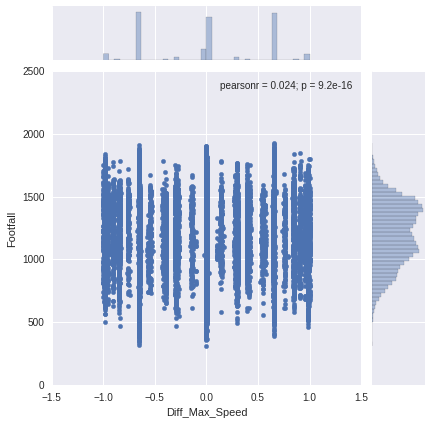

In [217]:
sns.jointplot("Diff_Max_Speed","Footfall",data=data)

In [233]:
data["Speed/Moisture"]=(data["Diff_Max_Speed"])*data["Diff_Max_Moisture"]

In [234]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [-25,40]
labels = ["low","medium","high"]
data["MaxSpeed_Bin"] = binning(data["Diff_Max_Speed"], cut_points, labels)
#print(pd.value_counts(data["MaxSpeed_Bin"], sort=False))

In [235]:
data.groupby(["MaxSpeed_Bin"]).mean().Footfall

MaxSpeed_Bin
low       1149.780304
medium    1208.398913
high      1193.981318
Name: Footfall, dtype: float64

In [236]:
data["MaxSpeed_Bin"].value_counts()

medium    104915
low         7697
high        1927
dtype: int64

In [237]:
data["speed_Ratio"] = np.tan(data["Diff_Max_Speed"]*data["Diff_Min_Speed"])

In [282]:
#the wind speed is due to difference in pressure
data["Pressure/Wind"] = (data["Max_Atmospheric_Pressure"]-data["Min_Atmospheric_Pressure"])/(data["Max_Breeze_Speed"]-data["Min_Breeze_Speed"])

In [301]:
data.loc[data["Pressure/Wind"]>1000000,]

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Day,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,...,Speed_Range,Pressure_Range,Moisture_Range,Pollution_Range,Season,Mean_Park_Month,Diff_Speed,Rain,Poll/Moisture_diff,Poll/Moisture


In [1]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,180,270]
labels = ["SW","SE","NE","NW"]
data["Wind_Origination"] = binning(data["Direction_Of_Wind"], cut_points, labels)
#print(pd.value_counts(data["MaxSpeed_Bin"], sort=False))
#data["Wind_Origination"] = data["Wind_Origination"].apply(lambda x: 'W' if x=="W2" else x)

NameError: name 'data' is not defined

In [284]:
data["Wind_Origination"].value_counts()

NE    37916
E     31688
N     19697
SW    17086
S     15131
SE    13630
NW    11790
W      7021
Name: Wind_Origination, dtype: int64

In [285]:
data.groupby("Wind_Origination").mean().Footfall

Wind_Origination
E     1206.167843
N     1227.269742
NE    1238.576055
NW    1208.168651
S     1162.844166
SE    1198.084571
SW    1139.331445
W     1199.299805
Name: Footfall, dtype: float64

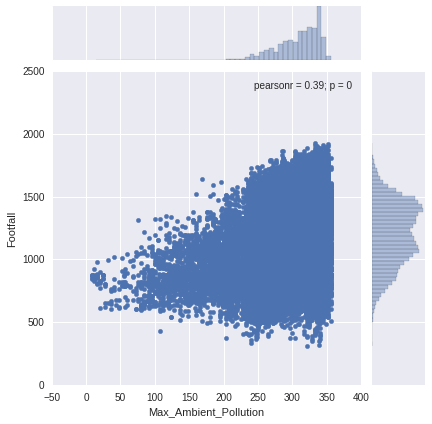

In [286]:
sns.jointplot("Max_Ambient_Pollution","Footfall",data=data)

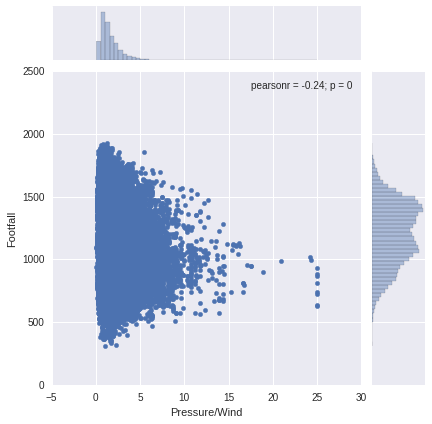

In [312]:
sns.jointplot("Pressure/Wind","Footfall",data=data)

In [287]:
data["Pressure/Wind"] = data["Pressure/Wind"].apply(lambda x: 25 if x>25 else x)

In [56]:
p=0
for i in data.dtypes.loc[data.dtypes=="float64",].index:
    data[p] = data["Var1"]/data[i]
    p+=1

In [57]:
i=list(range(17))
i.append("Footfall")
data[i].corr().Footfall

0           0.015260
1           0.096536
2           0.085656
3           0.096755
4                NaN
5           0.058833
6           0.059297
7           0.058423
8           0.006131
9           0.046070
10          0.071641
11          0.061383
12          0.090191
13          0.065529
14          0.117539
15         -0.033314
16          0.051836
Footfall    1.000000
Name: Footfall, dtype: float64

In [59]:
data.dtypes.loc[data.dtypes=="float64",]

Direction_Of_Wind               float64
Average_Breeze_Speed            float64
Max_Breeze_Speed                float64
Min_Breeze_Speed                float64
Var1                            float64
Average_Atmospheric_Pressure    float64
Max_Atmospheric_Pressure        float64
Min_Atmospheric_Pressure        float64
Min_Ambient_Pollution           float64
Max_Ambient_Pollution           float64
Average_Moisture_In_Park        float64
Max_Moisture_In_Park            float64
Min_Moisture_In_Park            float64
Speed_Range                     float64
Pressure_Range                  float64
Moisture_Range                  float64
Pollution_Range                 float64
0                               float64
1                               float64
2                               float64
3                               float64
4                               float64
5                               float64
6                               float64
7                               float64


In [243]:
data["Speed/Moisture"] = data["Speed_Range"]

KeyError: 'Speed_Range'

In [288]:
data["Temperature"] = data["Average_Atmospheric_Pressure"]/data["Average_Moisture_In_Park"]

In [302]:
data.loc[data["Temperature"]>10000,]

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Day,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,...,Speed_Range,Pressure_Range,Moisture_Range,Pollution_Range,Season,Mean_Park_Month,Diff_Speed,Rain,Poll/Moisture_diff,Poll/Moisture


In [81]:
data2.groupby(["Location"]).mean()
#Dec-Feb: winter
#Mar-May:spring
#Jun-Aug: summer
#Sep-Nov: autumn

,Footfall,Speed_Range,Pressure_Range,Moisture_Range,Pollution_Range
Location,,,,,
1,1202.125845,36.898821,50.549247,77.238936,145.427316
2,1204.181155,33.255063,50.298642,81.289251,143.306427
3,1203.971643,35.670004,50.434303,79.690706,141.574332
4,1206.157335,32.129846,50.300618,88.214084,147.666778


In [77]:
data2=DataFrame()
data2["Footfall"] = data["Footfall"]

In [289]:
data["Speed_Range"] = data["Max_Breeze_Speed"]-data["Min_Breeze_Speed"]
data["Pressure_Range"] = data["Max_Atmospheric_Pressure"]-data["Min_Atmospheric_Pressure"]
data["Moisture_Range"] = data["Max_Moisture_In_Park"]-data["Min_Moisture_In_Park"]
data["Pollution_Range"] = data["Max_Ambient_Pollution"]-data["Min_Ambient_Pollution"]

In [290]:
def func(x):
    if x in [12,1,2]:
        return "Winter"
    elif x in [3,4,5]:
        return "Spring"
    elif x in [6,7,8]:
        return "Summer"
    else:
        return "Autumn"
data["Season"] = data["Month"].apply(func)

In [291]:
data["Mean_Park_Month"]=train.groupby(["Park_ID","Month"]).transform(lambda x: x.mean()).Footfall

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,...,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall,Day,Weekday,Year,Month,Mean_Park_Month
0,3311712,12,1990-01-09,194.0,37.24,60.8,15.2,92.1300,8225.000000,8259.000000,...,255.0,288.0,222.0,3,1406,1,1,1990,1,1061.223188
1,3311812,12,1990-02-09,285.0,32.68,60.8,7.6,14.1100,8232.000000,8280.000000,...,252.0,297.0,204.0,3,1409,4,1,1990,2,1060.612698
2,3311912,12,1990-03-09,319.0,43.32,60.8,15.2,35.6900,8321.000000,8355.000000,...,219.0,279.0,165.0,3,1386,4,1,1990,3,1118.857971
3,3312012,12,1990-04-09,297.0,25.84,38.0,7.6,0.0249,8379.000000,8396.000000,...,225.0,261.0,192.0,3,1365,0,1,1990,4,1214.529940
4,3312112,12,1990-05-09,207.0,28.88,45.6,7.6,0.8300,8372.000000,8393.000000,...,234.0,273.0,183.0,3,1413,2,1,1990,5,1271.310145
5,3312212,12,1990-06-09,243.0,74.48,106.4,45.6,133.6300,8263.000000,8331.000000,...,255.0,285.0,192.0,3,1418,5,0,1990,6,1341.356287
6,3312312,12,1990-07-09,241.0,57.76,68.4,38.0,25.7300,8311.000000,8331.000000,...,237.0,294.0,204.0,3,1429,0,1,1990,7,1385.252174
7,3312412,12,1990-08-09,227.0,34.20,68.4,15.2,53.1200,8352.000000,8376.000000,...,291.0,297.0,270.0,3,1434,3,1,1990,8,1375.168116
8,3312512,12,1990-09-09,211.0,17.48,30.4,7.6,0.0249,8400.000000,8413.000000,...,273.0,297.0,231.0,3,1425,6,0,1990,9,1308.210227
9,3312612,12,1990-10-09,221.0,24.32,53.2,7.6,0.0249,8393.000000,8410.000000,...,291.0,300.0,267.0,3,1445,1,1,1990,10,1222.461538


In [90]:
data.groupby("Day").mean()

Day
0    1204.267101
1    1204.277823
2    1204.273745
3    1204.721479
4    1203.518676
5    1204.645891
6    1203.817399
Name: Mean_Park_Month, dtype: float64

In [292]:
data["Diff_Speed"]=0
for i in range(1,data.shape[0]):
    data.set_value(i,"Diff_Speed",(data["Average_Breeze_Speed"][i]-data["Average_Breeze_Speed"][i-1]))

ValueError: NumPy boolean array indexing assignment cannot assign 4 input values to the 2 output values where the mask is true

In [249]:
data["Diff_Moisture"]=0
for i in range(1,data.shape[0]):
    data.set_value(i,"Diff_Moisture",(data["Average_Moisture_In_Park"][i]-data["Average_Moisture_In_Park"][i-1]))

In [250]:
data["Diff_Pressure"]=0
for i in range(1,data.shape[0]):
    data.set_value(i,"Diff_Pressure",(data["Average_Atmospheric_Pressure"][i]-data["Average_Atmospheric_Pressure"][i-1]))

In [251]:
data["Pressure_Difference"] = data["Max_Atmospheric_Pressure"]-data["Min_Atmospheric_Pressure"]
data.corr().Average_Breeze_Speed

ID                             -0.019275
Park_ID                        -0.246250
Direction_Of_Wind               0.131302
Average_Breeze_Speed            1.000000
Max_Breeze_Speed                0.939616
Min_Breeze_Speed                0.880322
Var1                            0.230446
Average_Atmospheric_Pressure   -0.326197
Max_Atmospheric_Pressure       -0.271801
Min_Atmospheric_Pressure       -0.360644
Min_Ambient_Pollution           0.283976
Max_Ambient_Pollution           0.041894
Average_Moisture_In_Park       -0.004865
Max_Moisture_In_Park           -0.289602
Min_Moisture_In_Park            0.169049
Location_Type                  -0.062131
Footfall                       -0.074982
Day                             0.015471
Weekday                        -0.010013
Year                           -0.013621
Month                          -0.032598
Pressure/Moisture               0.289151
Diff_Max_Speed                  0.340997
Diff_Max_Moisture              -0.136470
Diff_Min_Speed  

In [293]:
#speed difference small, moisture difference positive, pressure diff large positive
#low air pressure -> rain possibility
#high moisture -> rain possibility
#high pressure difference -> high wind -> rain possibilty
data["Rain"] = ((data["Average_Moisture_In_Park"]*data["Average_Breeze_Speed"])/(data["Average_Atmospheric_Pressure"]))

In [304]:
data.loc[data["Rain"]>10000,]

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Day,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,...,Speed_Range,Pressure_Range,Moisture_Range,Pollution_Range,Season,Mean_Park_Month,Diff_Speed,Rain,Poll/Moisture_diff,Poll/Moisture


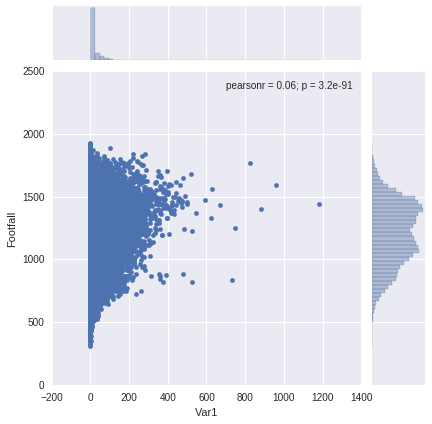

In [166]:
sns.jointplot("Var1","Footfall",data=data)

In [294]:
data["Poll/Moisture_diff"] = (data["Max_Ambient_Pollution"]/(data["Max_Moisture_In_Park"]-data["Min_Moisture_In_Park"]+35))

In [305]:
data.loc[data["Poll/Moisture_diff"]>100000,]

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Day,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,...,Speed_Range,Pressure_Range,Moisture_Range,Pollution_Range,Season,Mean_Park_Month,Diff_Speed,Rain,Poll/Moisture_diff,Poll/Moisture


In [295]:
data["Poll/Moisture"] = (data["Max_Ambient_Pollution"]/data["Average_Moisture_In_Park"])

In [256]:
data.corr()["Footfall"]

ID                              0.005945
Park_ID                         0.004938
Direction_Of_Wind               0.098399
Average_Breeze_Speed           -0.074982
Max_Breeze_Speed               -0.038060
Min_Breeze_Speed               -0.110378
Var1                            0.046651
Average_Atmospheric_Pressure   -0.057305
Max_Atmospheric_Pressure       -0.111381
Min_Atmospheric_Pressure       -0.007582
Min_Ambient_Pollution           0.180966
Max_Ambient_Pollution           0.390374
Average_Moisture_In_Park       -0.391229
Max_Moisture_In_Park           -0.096657
Min_Moisture_In_Park           -0.438461
Location_Type                   0.004230
Footfall                        1.000000
Day                             0.002836
Weekday                         0.000136
Year                           -0.010730
Month                           0.054729
Pressure/Moisture              -0.262165
Diff_Max_Speed                  0.055075
Diff_Max_Moisture              -0.021462
Diff_Min_Speed  

In [296]:
data.to_csv("data_Final.csv",index=False)